<a href="https://colab.research.google.com/github/souhaylelhammadi/analytique-des-donn-es-et-informatique-d-cisionnelle/blob/main/TP4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Imports
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = pd.Categorical.from_codes(iris.target,
iris.target_names)

print(df.head())
print(df.columns)


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  
Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'species'],
      dtype='object')


In [ ]:
#Combien de classes ?
print(df['species'].nunique())

3


In [ ]:
# Séparer les caractéristiques et la cible
X = df.iloc[:, :-1]
y = df['species']
# Diviser les données en train / test
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.3, random_state=43
)
print("Train:", X_train.shape, "Test:", X_test.shape)
print(X_train)
print(X_test)
print(y_train)

Train: (105, 4) Test: (45, 4)
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
55                5.7               2.8                4.5               1.3
90                5.5               2.6                4.4               1.2
79                5.7               2.6                3.5               1.0
65                6.7               3.1                4.4               1.4
56                6.3               3.3                4.7               1.6
..                ...               ...                ...               ...
58                6.6               2.9                4.6               1.3
21                5.1               3.7                1.5               0.4
49                5.0               3.3                1.4               0.2
64                5.6               2.9                3.6               1.3
68                6.2               2.2                4.5               1.5

[105 rows x 4 columns]
     sepal length (cm)

In [ ]:
# Créer et entraîner le modèle KNN
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)
# Prédictions
y_pred = knn.predict(X_test)
# Évaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test,
y_pred))
for i in range(1,8,2):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train, y_train)
  # Prédictions
  y_pred = knn.predict(X_test)
  # Évaluation
  print("Accuracy",i,":",accuracy_score(y_test, y_pred))




Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      1.00      1.00        17
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Accuracy 1 : 0.9777777777777777
Accuracy 3 : 1.0
Accuracy 5 : 0.9777777777777777
Accuracy 7 : 0.9555555555555556


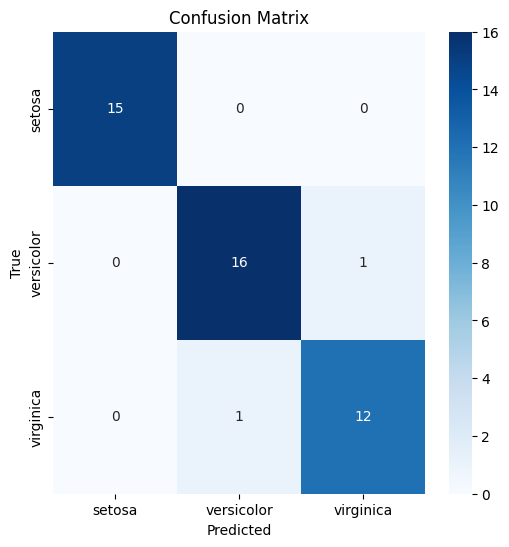

In [ ]:
# Matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 6))
sns.heatmap(
    conf_matrix,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=iris.target_names,
    yticklabels=iris.target_names
)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

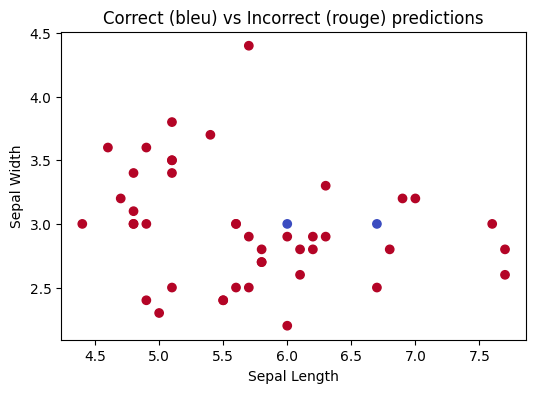

In [ ]:

# Visualisation simple des prédictions (correct / incorrect)
plt.figure(figsize=(6, 4))
plt.scatter(
    X_test.iloc[:, 0],
    X_test.iloc[:, 1],
    c=(y_pred == y_test),
    cmap='coolwarm'
)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Correct (bleu) vs Incorrect (rouge) predictions')
plt.show()

In [ ]:
classification_report(y_test, y_pred)


'              precision    recall  f1-score   support\n\n      setosa       1.00      1.00      1.00        15\n  versicolor       0.94      0.94      0.94        17\n   virginica       0.92      0.92      0.92        13\n\n    accuracy                           0.96        45\n   macro avg       0.95      0.95      0.95        45\nweighted avg       0.96      0.96      0.96        45\n'

In [ ]:
from sklearn.preprocessing import StandardScaler

# PARTIE 7 : STANDARDISATION

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



# KNN AVEC NORMALISATION

knn_scaled = KNeighborsClassifier(n_neighbors=3)
knn_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = knn_scaled.predict(X_test_scaled)

print("\nAccuracy avec normalisation :", accuracy_score(y_test, y_pred_scaled))
print("\nClassification Report (avec normalisation):\n")
print(classification_report(y_test, y_pred_scaled))



# COMPARAISON FINALE

print("Comparaison finale :")
print("Sans normalisation :", accuracy_score(y_test, y_pred))
print("Avec normalisation :", accuracy_score(y_test, y_pred_scaled))


Accuracy avec normalisation : 0.9777777777777777

Classification Report (avec normalisation):

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.94      1.00      0.97        17
   virginica       1.00      0.92      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.98        45
weighted avg       0.98      0.98      0.98        45

Comparaison finale :
Sans normalisation : 0.9555555555555556
Avec normalisation : 0.9777777777777777
